### **Introduction**
Employee attrition (when employees leave the company) can be costly, both in terms of productivity and recruitment expenses. By leveraging machine learning techniques, the goal is to identify patterns in employee data that predict whether an employee is likely to leave or stay.

### **Objective**

Build a predictive model that helps HR professionals understand what drives employee retention and how to reduce attrition in the organization.

 ## **Dataset Source**

   - https://www.kaggle.com/datasets/patelprashant/employee-attrition/data

In [ ]:
!pip install graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from sklearn import tree
import graphviz
import seaborn as sns
sns.set_style('darkgrid')

## **Load Data**



In [ ]:
emp = pd.read_csv("employee_attrition.csv")

In [ ]:
attrition = emp['Attrition'].value_counts()
print(attrition)

Attrition
No     1233
Yes     237
Name: count, dtype: int64





*   This is an imbalanced dataset as 237/1233 or the ratio of yes to no is a low percentage or ratio.
*   Some challenges of class imablance can be bis to the majority class, inadequate resutls on the minority class, and missing cases.
*   Some ways to handle these issues can be to undersample, oversample, adjust the weight classes, or consider the class with lower distribution as the anomaly.


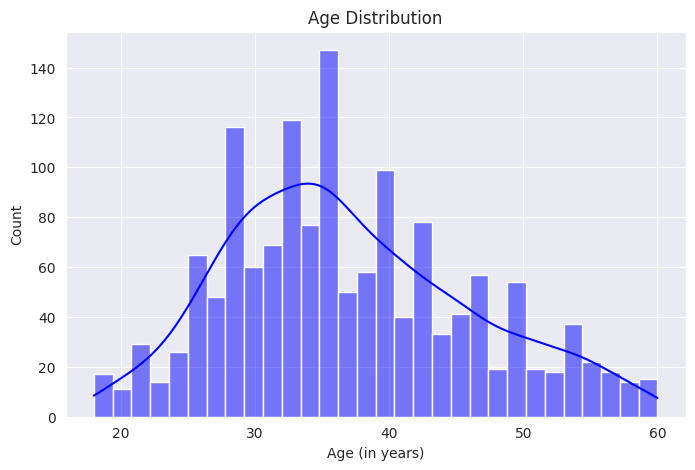

In [ ]:
#Graph the Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(emp['Age'], kde=True, bins=30, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age (in years)")
plt.ylabel("Count")
plt.show()

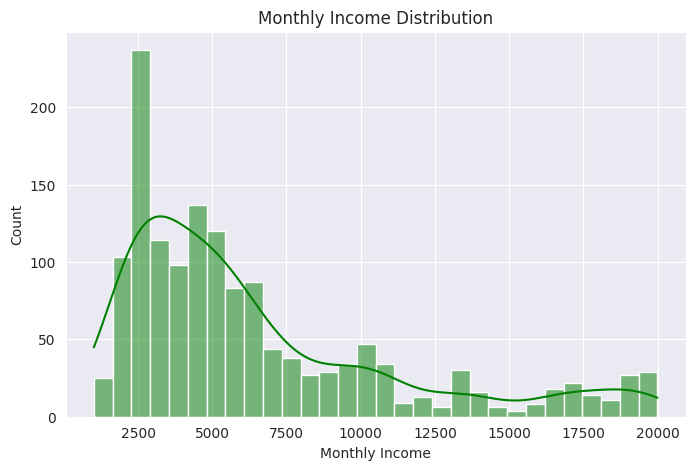

In [ ]:
#Graph Monthly Income
plt.figure(figsize=(8, 5))
sns.histplot(emp["MonthlyIncome"], kde = True, bins=30, color="green")
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.show()

In [ ]:
np.shape(emp)

(1470, 35)

In [ ]:
#Extracting feature columns
df_features = emp.drop(columns=["Attrition"])

In [ ]:
#extracting target column from dataset
df_target = emp[['Attrition']]

In [ ]:
print(df_features.head(5))
print(df_target.head(5))

   Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1   

In [ ]:
categorical_variables = df_features.select_dtypes(exclude=['numeric'])
categorical_variables.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
#using training and testing sets
from sklearn.model_selection import train_test_split
y = df_target.squeeze()
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 34)
(294, 34)
(1176,)
(294,)


In [ ]:
#Using gini impurity measure
from sklearn.tree import DecisionTreeClassifier, plot_tree
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
clf = DecrisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

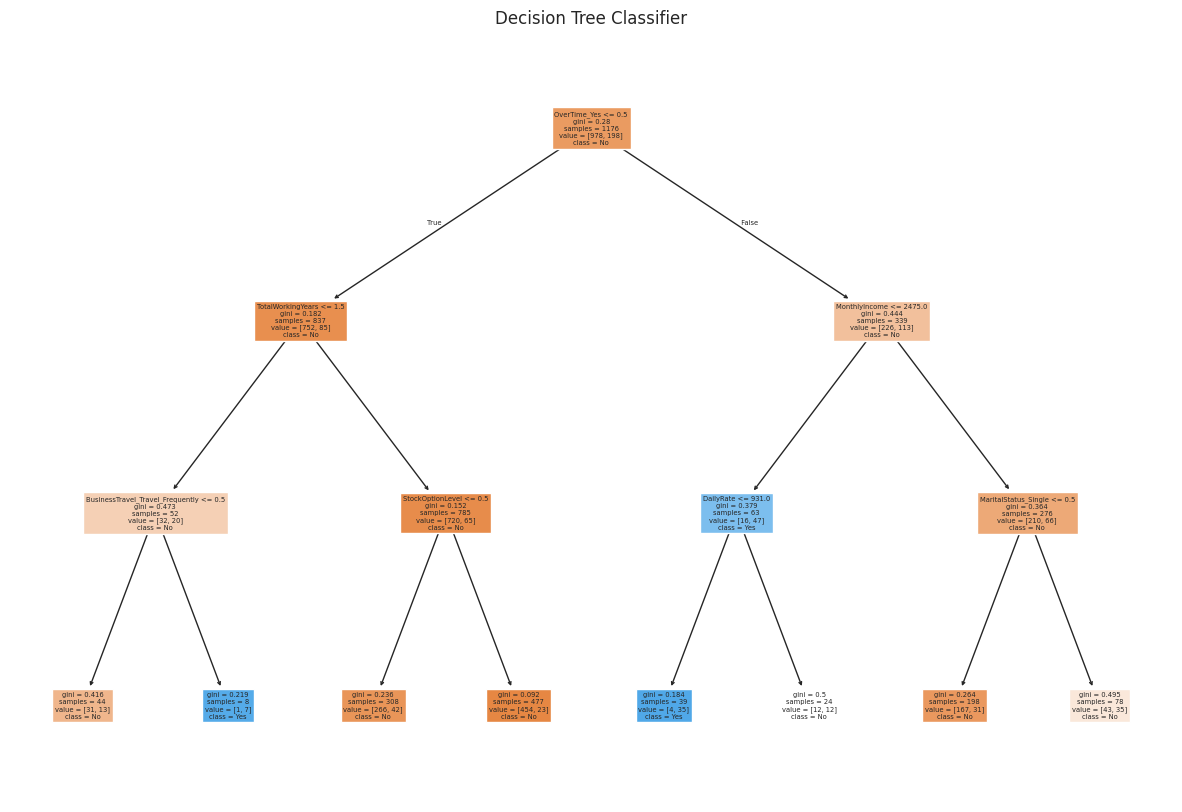

In [ ]:
#Visualise the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X_train_encoded.columns, class_names=np.unique(y_train))
plt.title("Decision Tree Classifier")
plt.show()


To reach the leftmmost leaf mode, overtime == "Yes" would be True would be the first step to the left subtree. If TotalWorkingYears <= 1.5 is True, it goes left. If BusinessTravek_Travel_Frequently <= 0.5 is True, it goes on to left again. It will reach the last leaf node as Class = "No" which predicts that the employee will stay. Therefore, employees who work overtime, have less than one and a half years of total experiences, and do not travel much are more likely to stay with the company.

In [ ]:
#One hot encode categorical data
X_test_encoded = pd.get_dummies(X_test)
X_test_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
1041,28,866,5,3,1,1469,4,84,3,2,...,False,False,True,False,False,False,True,True,True,False
184,53,1084,13,2,1,250,4,57,4,2,...,False,False,False,False,True,False,False,True,True,False
1222,24,240,22,1,1,1714,4,58,1,1,...,False,False,False,False,False,True,False,True,True,False
67,45,1339,7,3,1,86,2,59,3,3,...,False,True,False,False,True,False,False,True,True,False
220,36,1396,5,2,1,304,4,62,3,2,...,False,False,False,False,False,False,True,True,True,False


In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[categorical_cols])

X_train_encoded = encoder.transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

X_train_full = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded], axis=1)
X_test_full = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded], axis=1)

X_test_full = X_test_full.reindex(columns=X_train_full.columns, fill_value=0)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_full, y_train)

y_pred = clf.predict(X_test_full)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

random_instance_index = random.randint(0, len(X_test_full) - 1)
random_instance = X_test_full.iloc[random_instance_index, :].to_frame().T

prediction = clf.predict(random_instance)
print(f"Prediction for the selected instance: {prediction[0]}")

# Visualize the prediction node path
node_indicator = clf.decision_path(random_instance)

# Get the indices of the nodes visited along the decision path
node_indices = node_indicator.indices

# Extract the node names and conditions for the decision path
decision_path_info = []

for node_index in node_indices:
    feature_index = clf.tree_.feature[node_index]

    if feature_index != -2:
        feature_name = X_train_full.columns[feature_index]
        threshold = clf.tree_.threshold[node_index]
        decision_path_info.append((node_index, feature_name, threshold))

for node_index, feature_name, threshold in decision_path_info:
    print(f"Node {node_index}: Feature '{feature_name}' <= {threshold}")


Model Accuracy: 0.78
Prediction for the selected instance: No
Node 0: Feature 'OverTime_No' <= 0.5
Node 114: Feature 'TotalWorkingYears' <= 1.5
Node 134: Feature 'StockOptionLevel' <= 0.5
Node 208: Feature 'YearsAtCompany' <= 31.5
Node 209: Feature 'DailyRate' <= 1495.5
Node 210: Feature 'YearsAtCompany' <= 1.5
Node 222: Feature 'EmployeeNumber' <= 2028.5
Node 223: Feature 'JobRole_Human Resources' <= 0.5
Node 224: Feature 'JobRole_Laboratory Technician' <= 0.5
Node 225: Feature 'PercentSalaryHike' <= 11.5
Node 239: Feature 'DailyRate' <= 122.5
Node 243: Feature 'StockOptionLevel' <= 2.5


In [ ]:
#compare the model's predictions against the actual target values in the test dataset with accuracy score
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test_full)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7789115646258503

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

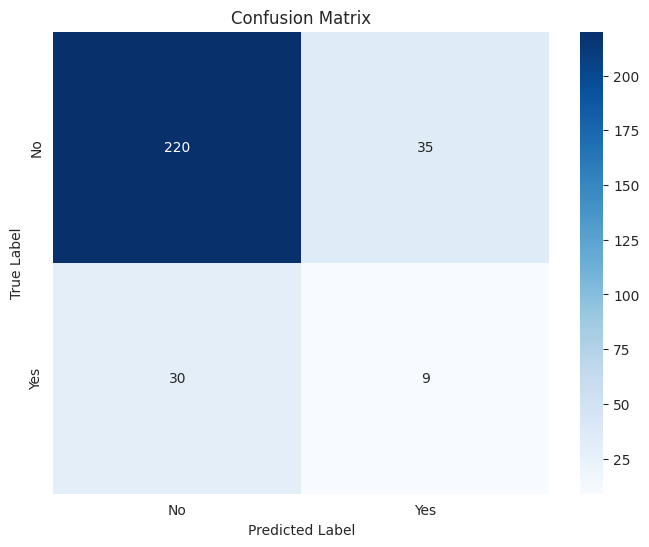

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


A: This confusion matrix represents the performance of a classification model with two classes: Yes and No. The matrix in clock-wise order was true negative, false positives, true positives, and false negatives. 220 were correctly predicted "No", 35 were wrongly predicted "Yes" when the actual answer was "No", 9 were correctly predicted as "Yes", and 30 were predicted "No" when it was "No".

B: The false positives mean that the attrition would be wrongly predicted when employees plan on staying. This may mean that resources and company time would be used to combat the reprussions of the the expected untrue attrition. Not correctly finding the employees that are at attrition cause the company to lose money.

C: A confusion matrix indicates if there is a more of a Type 1 or Type 2 error and other results that may be more insightful for evaluation. Accuracy may not work for this situation as this is an unbalanced dataset. Therefore, confusion matrix works better.

D: Some improvements can be trying different models such as Logistic Regression and adjust the decision threshold to hopefully reduce false negatives.